In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Auto_Insurance_Claims_amount.csv')
data

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

### Exploratory Data Analysis

In [4]:
data.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [5]:
data.tail()

Customer Country State Code     State  Claim Amount Response  Coverage  \
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch          691.200000  Four-Door Car        Large  
9133    Call Center          369.600000   Two-Door Car      Medsize  

[5 rows x 26 columns]

#### Lets check the null values without using visualization

In [6]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

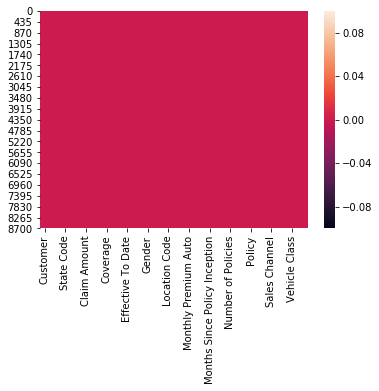

In [7]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [8]:
data = pd.DataFrame(data=data)
data

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
9129  LA72316      US         MO  Missouri   2340.598798       No     Basic   
9130  PK87824      US         MO  Missouri    309.651122      Yes  Extended   
9131  TD14365      US         MO  Missouri    816.389043       No  Extended   
9132  UP19263      US         MO  Missouri    752.444244       No  Extended   
9133  Y167826      US         MO  Missouri    261.183687       No  Extended   

     Education Effective To Date EmploymentStatus  ...  \
0     Bachelor           2/24/11         Employed  ...   
1     Bachelor           1/31/11       Unemployed  ...   
2     Bachelor           2/19/11         Employed  ...   
3     Bachelor           1/20/11       Unemployed  ...   
4     Bachelor            2/3/11         Employed  ...   
...        ...               ...              ...  ...   
9129  Bachelor           2/10/11         Employed  ...   
9130   College           2/12/11         Employed  ...   
9131  Bachelor            2/6/11       Unemployed  ...   
9132   College            2/3/11         Employed  ...   
9133   College           2/14/11       Unemployed  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch      

In [9]:
data['Customer'].unique()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

#### Here all the values of customer column is unique, it will not going to be used to predict the output(TotalClaim Amount) so I am deleting this column

In [10]:
data.drop(['Customer'],axis=1,inplace=True)

In [11]:
data

Country State Code     State  Claim Amount Response  Coverage Education  \
0         US         KS    Kansas    276.351928       No     Basic  Bachelor   
1         US         NE  Nebraska    697.953590       No  Extended  Bachelor   
2         US         OK  Oklahoma   1288.743165       No   Premium  Bachelor   
3         US         MO  Missouri    764.586183       No     Basic  Bachelor   
4         US         KS    Kansas    281.369258       No     Basic  Bachelor   
...      ...        ...       ...           ...      ...       ...       ...   
9129      US         MO  Missouri   2340.598798       No     Basic  Bachelor   
9130      US         MO  Missouri    309.651122      Yes  Extended   College   
9131      US         MO  Missouri    816.389043       No  Extended  Bachelor   
9132      US         MO  Missouri    752.444244       No  Extended   College   
9133      US         MO  Missouri    261.183687       No  Extended   College   

     Effective To Date EmploymentStatus Gender  ...  \
0              2/24/11         Employed      F  ...   
1              1/31/11       Unemployed      F  ...   
2              2/19/11         Employed      F  ...   
3              1/20/11       Unemployed      M  ...   
4               2/3/11         Employed      M  ...   
...                ...              ...    ...  ...   
9129           2/10/11         Employed      M  ...   
9130           2/12/11         Employed      F  ...   
9131            2/6/11       Unemployed      M  ...   
9132            2/3/11         Employed      M  ...   
9133           2/14/11       Unemployed      M  ...   

      Months Since Policy Inception Number of Open Complaints  \
0                                 5                         0   
1                                42                         0   
2                                38                         0   
3                                65                         0   
4                                44                         0   
...                             ...                       ...   
9129                             89                         0   
9130                             28                         0   
9131                             37                         3   
9132                              3                         0   
9133                             90                         0   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                     1  Corporate Auto  Corporate L3     Collision   
1                     8   Personal Auto   Personal L3  Scratch/Dent   
2                     2   Personal Auto   Personal L3     Collision   
3                     7  Corporate Auto  Corporate L2     Collision   
4                     1   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
9129                  2   Personal Auto   Personal L1          Hail   
9130                  1  Corporate Auto  Corporate L3     Collision   
9131                  2  Corporate Auto  Corporate L2     Collision   
9132                  3   Personal Auto   Personal L2  Scratch/Dent   
9133                  1  Corporate Auto  Corporate L3         Other   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
9129            Web          198.234764  Four-Door Car      Medsize  
9130         Branch          379.200000  Four-Door Car      Medsize  
9131         Branch          790.784983  Four-Door Car      Medsize  
9132         Branch          691.200000  Four-Doo

In [12]:
data['Country'].unique()

array(['US'], dtype=object)

#### Here there is only one value country column , so it not ncessary and henece deleting the column

In [13]:
data.drop(['Country'],axis=1,inplace=True)

In [14]:
data

State Code     State  Claim Amount Response  Coverage Education  \
0            KS    Kansas    276.351928       No     Basic  Bachelor   
1            NE  Nebraska    697.953590       No  Extended  Bachelor   
2            OK  Oklahoma   1288.743165       No   Premium  Bachelor   
3            MO  Missouri    764.586183       No     Basic  Bachelor   
4            KS    Kansas    281.369258       No     Basic  Bachelor   
...         ...       ...           ...      ...       ...       ...   
9129         MO  Missouri   2340.598798       No     Basic  Bachelor   
9130         MO  Missouri    309.651122      Yes  Extended   College   
9131         MO  Missouri    816.389043       No  Extended  Bachelor   
9132         MO  Missouri    752.444244       No  Extended   College   
9133         MO  Missouri    261.183687       No  Extended   College   

     Effective To Date EmploymentStatus Gender  Income  ...  \
0              2/24/11         Employed      F   56274  ...   
1              1/31/11       Unemployed      F       0  ...   
2              2/19/11         Employed      F   48767  ...   
3              1/20/11       Unemployed      M       0  ...   
4               2/3/11         Employed      M   43836  ...   
...                ...              ...    ...     ...  ...   
9129           2/10/11         Employed      M   71941  ...   
9130           2/12/11         Employed      F   21604  ...   
9131            2/6/11       Unemployed      M       0  ...   
9132            2/3/11         Employed      M   21941  ...   
9133           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Claim Reason  \
0                      1  Corporate Auto  Corporate L3     Collision   
1                      8   Personal Auto   Personal L3  Scratch/Dent   
2                      2   Personal Auto   Personal L3     Collision   
3                      7  Corporate Auto  Corporate L2     Collision   
4                      1   Personal Auto   Personal L1     Collision   
...                  ...             ...           ...           ...   
9129                   2   Personal Auto   Personal L1          Hail   
9130                   1  Corporate Auto  Corporate L3     Collision   
9131                   2  Corporate Auto  Corporate L2     Collision   
9132                   3   Personal Auto   Personal L2  Scratch/Dent   
9133                   1  Corporate Auto  Corporate L3         Other   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Branch         379.200000  Four-Door Car      Medsize  
9131         Branch         790.784983  Four-Door Car      Medsize  
9132         Branch         691.200000  Four-Door Car      

In [15]:
data['State Code'].unique()

array(['KS', 'NE', 'OK', 'MO', 'IA'], dtype=object)

In [16]:
data['State'].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

#### Here State Code and State both represents state so I am deleting one of them

In [17]:
data.drop(['State Code'],axis=1,inplace=True)

In [18]:
data

State  Claim Amount Response  Coverage Education Effective To Date  \
0       Kansas    276.351928       No     Basic  Bachelor           2/24/11   
1     Nebraska    697.953590       No  Extended  Bachelor           1/31/11   
2     Oklahoma   1288.743165       No   Premium  Bachelor           2/19/11   
3     Missouri    764.586183       No     Basic  Bachelor           1/20/11   
4       Kansas    281.369258       No     Basic  Bachelor            2/3/11   
...        ...           ...      ...       ...       ...               ...   
9129  Missouri   2340.598798       No     Basic  Bachelor           2/10/11   
9130  Missouri    309.651122      Yes  Extended   College           2/12/11   
9131  Missouri    816.389043       No  Extended  Bachelor            2/6/11   
9132  Missouri    752.444244       No  Extended   College            2/3/11   
9133  Missouri    261.183687       No  Extended   College           2/14/11   

     EmploymentStatus Gender  Income Location Code  ...  \
0            Employed      F   56274      Suburban  ...   
1          Unemployed      F       0      Suburban  ...   
2            Employed      F   48767      Suburban  ...   
3          Unemployed      M       0      Suburban  ...   
4            Employed      M   43836         Rural  ...   
...               ...    ...     ...           ...  ...   
9129         Employed      M   71941         Urban  ...   
9130         Employed      F   21604      Suburban  ...   
9131       Unemployed      M       0      Suburban  ...   
9132         Employed      M   21941      Suburban  ...   
9133       Unemployed      M       0      Suburban  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                                5                          0   
1                               42                          0   
2                               38                          0   
3                               65                          0   
4                               44                          0   
...                            ...                        ...   
9129                            89                          0   
9130                            28                          0   
9131                            37                          3   
9132                             3                          0   
9133                            90                          0   

      Number of Policies     Policy Type        Policy  Claim Reason  \
0                      1  Corporate Auto  Corporate L3     Collision   
1                      8   Personal Auto   Personal L3  Scratch/Dent   
2                      2   Personal Auto   Personal L3     Collision   
3                      7  Corporate Auto  Corporate L2     Collision   
4                      1   Personal Auto   Personal L1     Collision   
...                  ...             ...           ...           ...   
9129                   2   Personal Auto   Personal L1          Hail   
9130                   1  Corporate Auto  Corporate L3     Collision   
9131                   2  Corporate Auto  Corporate L2     Collision   
9132                   3   Personal Auto   Personal L2  Scratch/Dent   
9133                   1  Corporate Auto  Corporate L3         Other   

     Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0            Agent         384.811147   Two-Door Car      Medsize  
1            Agent        1131.464935  Four-Door Car      Medsize  
2            Agent         566.472247   Two-Door Car      Medsize  
3      Call Center         529.881344            SUV      Medsize  
4            Agent         138.130879  Four-Door Car      Medsize  
...            ...                ...            ...          ...  
9129           Web         198.234764  Four-Door Car      Medsize  
9130        Branch         379.200000  Four-Door Car      Medsize  
9131        Branch         790.784983  Four-Door Car      Medsize  
9132        Branch       

In [19]:
data['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [21]:
data['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [22]:
data['Effective To Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [23]:
data['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [24]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [25]:
data['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [26]:
data['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [27]:
data['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [28]:
data['Claim Reason'].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [29]:
data['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [30]:
data['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [31]:
data['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

#### Convert the Dataset to Numeric(boolean) Format

In [32]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [33]:
#For all those columns who has 3 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==3):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [34]:
data

State  Claim Amount Response  Coverage Education Effective To Date  \
0       Kansas    276.351928       No         0  Bachelor           2/24/11   
1     Nebraska    697.953590       No         1  Bachelor           1/31/11   
2     Oklahoma   1288.743165       No         2  Bachelor           2/19/11   
3     Missouri    764.586183       No         0  Bachelor           1/20/11   
4       Kansas    281.369258       No         0  Bachelor            2/3/11   
...        ...           ...      ...       ...       ...               ...   
9129  Missouri   2340.598798       No         0  Bachelor           2/10/11   
9130  Missouri    309.651122      Yes         1   College           2/12/11   
9131  Missouri    816.389043       No         1  Bachelor            2/6/11   
9132  Missouri    752.444244       No         1   College            2/3/11   
9133  Missouri    261.183687       No         1   College           2/14/11   

     EmploymentStatus Gender  Income  Location Code  ...  \
0            Employed      F   56274              1  ...   
1          Unemployed      F       0              1  ...   
2            Employed      F   48767              1  ...   
3          Unemployed      M       0              1  ...   
4            Employed      M   43836              0  ...   
...               ...    ...     ...            ...  ...   
9129         Employed      M   71941              2  ...   
9130         Employed      F   21604              1  ...   
9131       Unemployed      M       0              1  ...   
9132         Employed      M   21941              1  ...   
9133       Unemployed      M       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type        Policy  Claim Reason  \
0                      1            0  Corporate L3     Collision   
1                      8            1   Personal L3  Scratch/Dent   
2                      2            1   Personal L3     Collision   
3                      7            0  Corporate L2     Collision   
4                      1            1   Personal L1     Collision   
...                  ...          ...           ...           ...   
9129                   2            1   Personal L1          Hail   
9130                   1            0  Corporate L3     Collision   
9131                   2            0  Corporate L2     Collision   
9132                   3            1   Personal L2  Scratch/Dent   
9133                   1            0  Corporate L3         Other   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car            1  
1             Agent        1131.464935  Four-Door Car            1  
2             Agent         566.472247   Two-Door Car            1  
3       Call Center         529.881344            SUV            1  
4             Agent         138.130879  Four-Door Car            1  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car            1  
9130         Branch         379.200000  Four-Door Car            1  
9131         Branch         790.784983  Four-Door Car            1  
9132         Branch        

In [35]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [36]:
#For all those columns who has 4 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==4):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [37]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==5):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [38]:
data

State  Claim Amount  Response  Coverage  Education Effective To Date  \
0         1    276.351928         0         0          0           2/24/11   
1         3    697.953590         0         1          0           1/31/11   
2         4   1288.743165         0         2          0           2/19/11   
3         2    764.586183         0         0          0           1/20/11   
4         1    281.369258         0         0          0            2/3/11   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0           2/10/11   
9130      2    309.651122         1         1          1           2/12/11   
9131      2    816.389043         0         1          0            2/6/11   
9132      2    752.444244         0         1          1            2/3/11   
9133      2    261.183687         0         1          1           2/14/11   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type        Policy  Claim Reason  \
0                      1            0  Corporate L3             0   
1                      8            1   Personal L3             3   
2                      2            1   Personal L3             0   
3                      7            0  Corporate L2             0   
4                      1            1   Personal L1             0   
...                  ...          ...           ...           ...   
9129                   2            1   Personal L1             1   
9130                   1            0  Corporate L3             0   
9131                   2            0  Corporate L2             0   
9132                   3            1   Personal L2             3   
9133                   1            0  Corporate L3             2   

      Sales Channel Total Claim Amount  Vehicle Class  Vehicle Size  
0                 0         384.811147   Two-Door Car             1  
1                 0        1131.464935  Four-Door Car             1  
2                 0         566.472247   Two-Door Car             1  
3                 2         529.881344            SUV             1  
4                 0         138.130879  Four-Door Car             1  
...             ...                ...            ...           ...  
9129              3         198.234764  Four-Door Car             1  
9130              1         379.200000  Four-Door Car             1  
9131              1         790.784983  Four-Door Car             1  
91

In [39]:
#For all those columns who has 9 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==9):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [40]:
data

State  Claim Amount  Response  Coverage  Education Effective To Date  \
0         1    276.351928         0         0          0           2/24/11   
1         3    697.953590         0         1          0           1/31/11   
2         4   1288.743165         0         2          0           2/19/11   
3         2    764.586183         0         0          0           1/20/11   
4         1    281.369258         0         0          0            2/3/11   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0           2/10/11   
9130      2    309.651122         1         1          1           2/12/11   
9131      2    816.389043         0         1          0            2/6/11   
9132      2    752.444244         0         1          1            2/3/11   
9133      2    261.183687         0         1          1           2/14/11   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147   Two-Door Car             1  
1            1131.464935  Four-Door Car             1  
2             566.472247   Two-Door Car             1  
3             529.881344            SUV             1  
4             138.130879  Four-Door Car             1  
...                  ...            ...           ...  
9129          198.234764  Four-Door Car             1  
9130          379.200000  Four-Door Car             1  
9131          790.784983  Four-Door Car             1  
9132          691.200000  Four-Doo

In [41]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [42]:
data

State  Claim Amount  Response  Coverage  Education Effective To Date  \
0         1    276.351928         0         0          0           2/24/11   
1         3    697.953590         0         1          0           1/31/11   
2         4   1288.743165         0         2          0           2/19/11   
3         2    764.586183         0         0          0           1/20/11   
4         1    281.369258         0         0          0            2/3/11   
...     ...           ...       ...       ...        ...               ...   
9129      2   2340.598798         0         0          0           2/10/11   
9130      2    309.651122         1         1          1           2/12/11   
9131      2    816.389043         0         1          0            2/6/11   
9132      2    752.444244         0         1          1            2/3/11   
9133      2    261.183687         0         1          1           2/14/11   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.200000          

In [43]:
data.dtypes

State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                 object
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [44]:
data.dtypes

State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                 object
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

#### Converting Date into Numeric

In [45]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [46]:
array = data['Effective To Date']

array.shapearray = data['Effective To Date']

array.shape

(9134,)

In [47]:
le=LabelEncoder()
data1=le.fit_transform(data['Effective To Date'])
data1

array([47, 24, 41, ..., 55, 52, 36])

In [48]:
data['Effective To Date']=data1

In [49]:
data

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1    276.351928         0         0          0                 47   
1         3    697.953590         0         1          0                 24   
2         4   1288.743165         0         2          0                 41   
3         2    764.586183         0         0          0                 12   
4         1    281.369258         0         0          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2   2340.598798         0         0          0                 32   
9130      2    309.651122         1         1          1                 34   
9131      2    816.389043         0         1          0                 55   
9132      2    752.444244         0         1          1                 52   
9133      2    261.183687         0         1          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.2000

In [50]:
data['Effective To Date'].unique()

array([47, 24, 41, 12, 52, 17,  9, 18, 39, 44, 27, 55,  1,  8, 26, 50,  5,
       13, 54, 21, 51, 34, 42, 56, 14, 35,  6, 29,  2, 20, 57, 46, 11, 38,
       19, 15, 30, 33, 53, 31, 37, 49,  7,  0, 32, 16, 48,  3, 58, 10, 25,
       36, 43, 40, 22,  4, 23, 45, 28], dtype=int64)

In [51]:
data.dtypes

State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

#### Lets check the null values without using visualization

In [52]:
data.isnull().sum()

State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

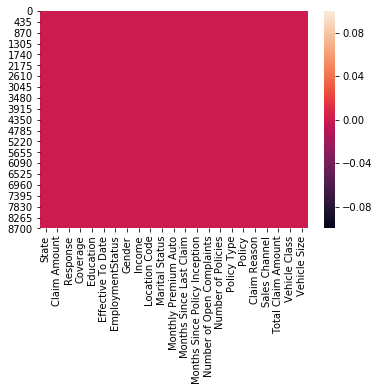

In [53]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [54]:
data = pd.DataFrame(data=data)
data

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1    276.351928         0         0          0                 47   
1         3    697.953590         0         1          0                 24   
2         4   1288.743165         0         2          0                 41   
3         2    764.586183         0         0          0                 12   
4         1    281.369258         0         0          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2   2340.598798         0         0          0                 32   
9130      2    309.651122         1         1          1                 34   
9131      2    816.389043         0         1          0                 55   
9132      2    752.444244         0         1          1                 52   
9133      2    261.183687         0         1          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0                    1       0   56274              1  ...   
1                    4       0       0              1  ...   
2                    1       0   48767              1  ...   
3                    4       1       0              1  ...   
4                    1       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129                 1       1   71941              2  ...   
9130                 1       0   21604              1  ...   
9131                 4       1       0              1  ...   
9132                 1       1   21941              1  ...   
9133                 4       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
9129                             89                          0   
9130                             28                          0   
9131                             37                          3   
9132                              3                          0   
9133                             90                          0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0                      0            0       2             0              0   
1                      7            1       5             3              0   
2                      1            1       5             0              0   
3                      6            0       1             0              2   
4                      0            1       3             0              0   
...                  ...          ...     ...           ...            ...   
9129                   1            1       3             1              3   
9130                   0            0       2             0              1   
9131                   1            0       1             0              1   
9132                   2            1       4             3              1   
9133                   0            0       2             2              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0             384.811147              5             1  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
...                  ...            ...           ...  
9129          198.234764              0             1  
9130          379.200000              0             1  
9131          790.784983              0             1  
9132          691.2000

#### Removing the Outliers

In [55]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(9134, 23)
(8470, 23)


#### Checking Skewness and Removing it

In [56]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

In [57]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [58]:
#Lets Again Check the Skewness
data.skew()

State                            0.021065
Claim Amount                     0.578248
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.433288
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.506774
Total Claim Amount              -1.741369
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

#### Let's Find Out the Correlation

In [59]:
dfcor = data.corr()
dfcor

State  Claim Amount  Response  Coverage  \
State                          1.000000     -0.007798 -0.001732  0.008352   
Claim Amount                  -0.007798      1.000000 -0.006259  0.220307   
Response                      -0.001732     -0.006259  1.000000  0.000280   
Coverage                       0.008352      0.220307  0.000280  1.000000   
Education                      0.004256      0.029317  0.000285  0.022528   
Effective To Date             -0.000448     -0.012767 -0.043133  0.005740   
EmploymentStatus              -0.003751     -0.048243 -0.008671  0.007114   
Gender                         0.000545     -0.011072  0.004396 -0.015726   
Income                         0.002682      0.041918  0.011932 -0.014182   
Location Code                  0.001382      0.003582  0.001729 -0.018220   
Marital Status                -0.008975     -0.033649 -0.094843  0.001766   
Monthly Premium Auto          -0.000917      0.461131  0.010606  0.506815   
Months Since Last Claim        0.009249      0.009432 -0.016597  0.016640   
Months Since Policy Inception -0.004459      0.001316  0.002952  0.009316   
Number of Open Complaints      0.015200     -0.037972 -0.014262 -0.006407   
Number of Policies            -0.008267      0.361751 -0.031023 -0.018731   
Policy Type                   -0.009102      0.018362  0.001110  0.002766   
Policy                        -0.014193      0.012478 -0.001461 -0.001198   
Claim Reason                   0.002564     -0.093169 -0.131415 -0.044662   
Sales Channel                  0.002662     -0.014347 -0.086607 -0.028655   
Total Claim Amount             0.003645      0.156762  0.054391  0.182003   
Vehicle Class                 -0.004813      0.103862  0.021225 -0.017606   
Vehicle Size                  -0.000956      0.019862 -0.050691 -0.005661   

                               Education  Effective To Date  EmploymentStatus  \
State                           0.004256          -0.000448         -0.003751   
Claim Amount                    0.029317          -0.012767         -0.048243   
Response                        0.000285          -0.043133         -0.008671   
Coverage                        0.022528           0.005740          0.007114   
Education                       1.000000           0.001276         -0.028035   
Effective To Date               0.001276           1.000000         -0.000944   
EmploymentStatus               -0.028035          -0.000944          1.000000   
Gender                          0.002206          -0.013322          0.040422   
Income                          0.018709          -0.000531         -0.658870   
Location Code                  -0.011533          -0.001960          0.014778   
Marital Status                  0.005675          -0.014265          0.298114   
Monthly Premium Auto            0.027980           0.007718          0.008331   
Months Since Last Claim         0.003021          -0.003912          0.008701   
Months Since Policy Inception   0.004140           0.008281          0.015166   
Number of Open Complaints      -0.021060          -0.009072          0.011004   
Number of Policies              0.008491           0.002932          0.006944   
Policy Type                     0.011650          -0.007466         -0.002898   
Policy                          0.011119          -0.006625          0.000428   
Claim Reason                    0.059085           0.000626         -0.110389   
Sales Channel                  -0.005018          -0.010888         -0.019699   
Total Claim Amount              0.011618          -0.006866          0.269979   
Vehicle Class                   0.010192          -0.019002         -0.005341   
Vehicle Size                   -0.005491           0.005368         -0.012229   

                                 Gender    Income  Location Code  ...  \
State                          0.000545  0.002682       0.001382  ...   
Claim Amount                  -0.011072  0.041918       0.003582  ...   
Response             

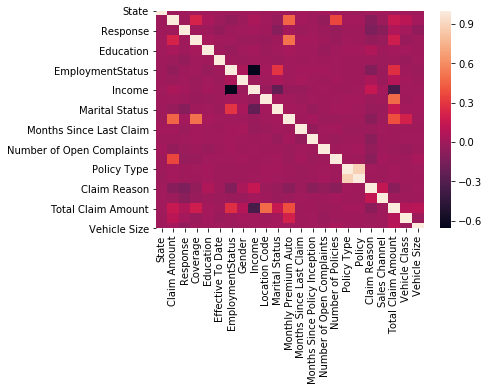

In [60]:
sns.heatmap(dfcor)

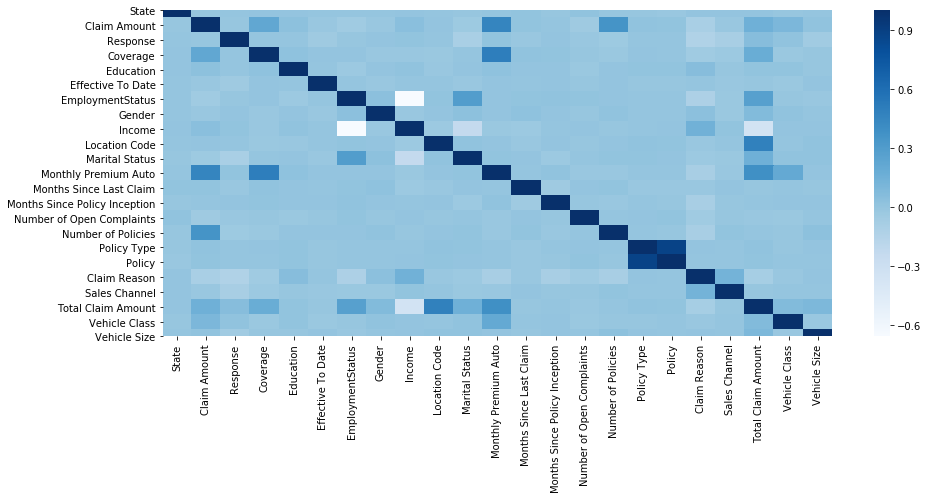

In [61]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

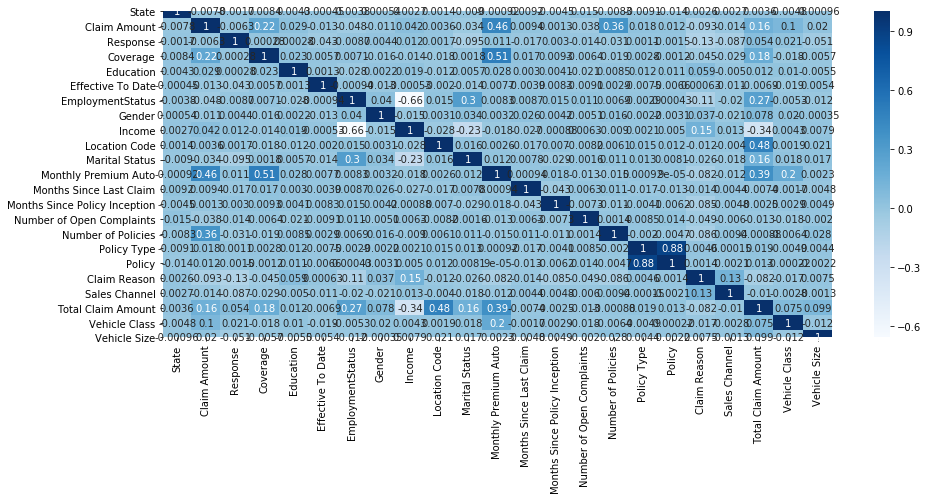

In [62]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

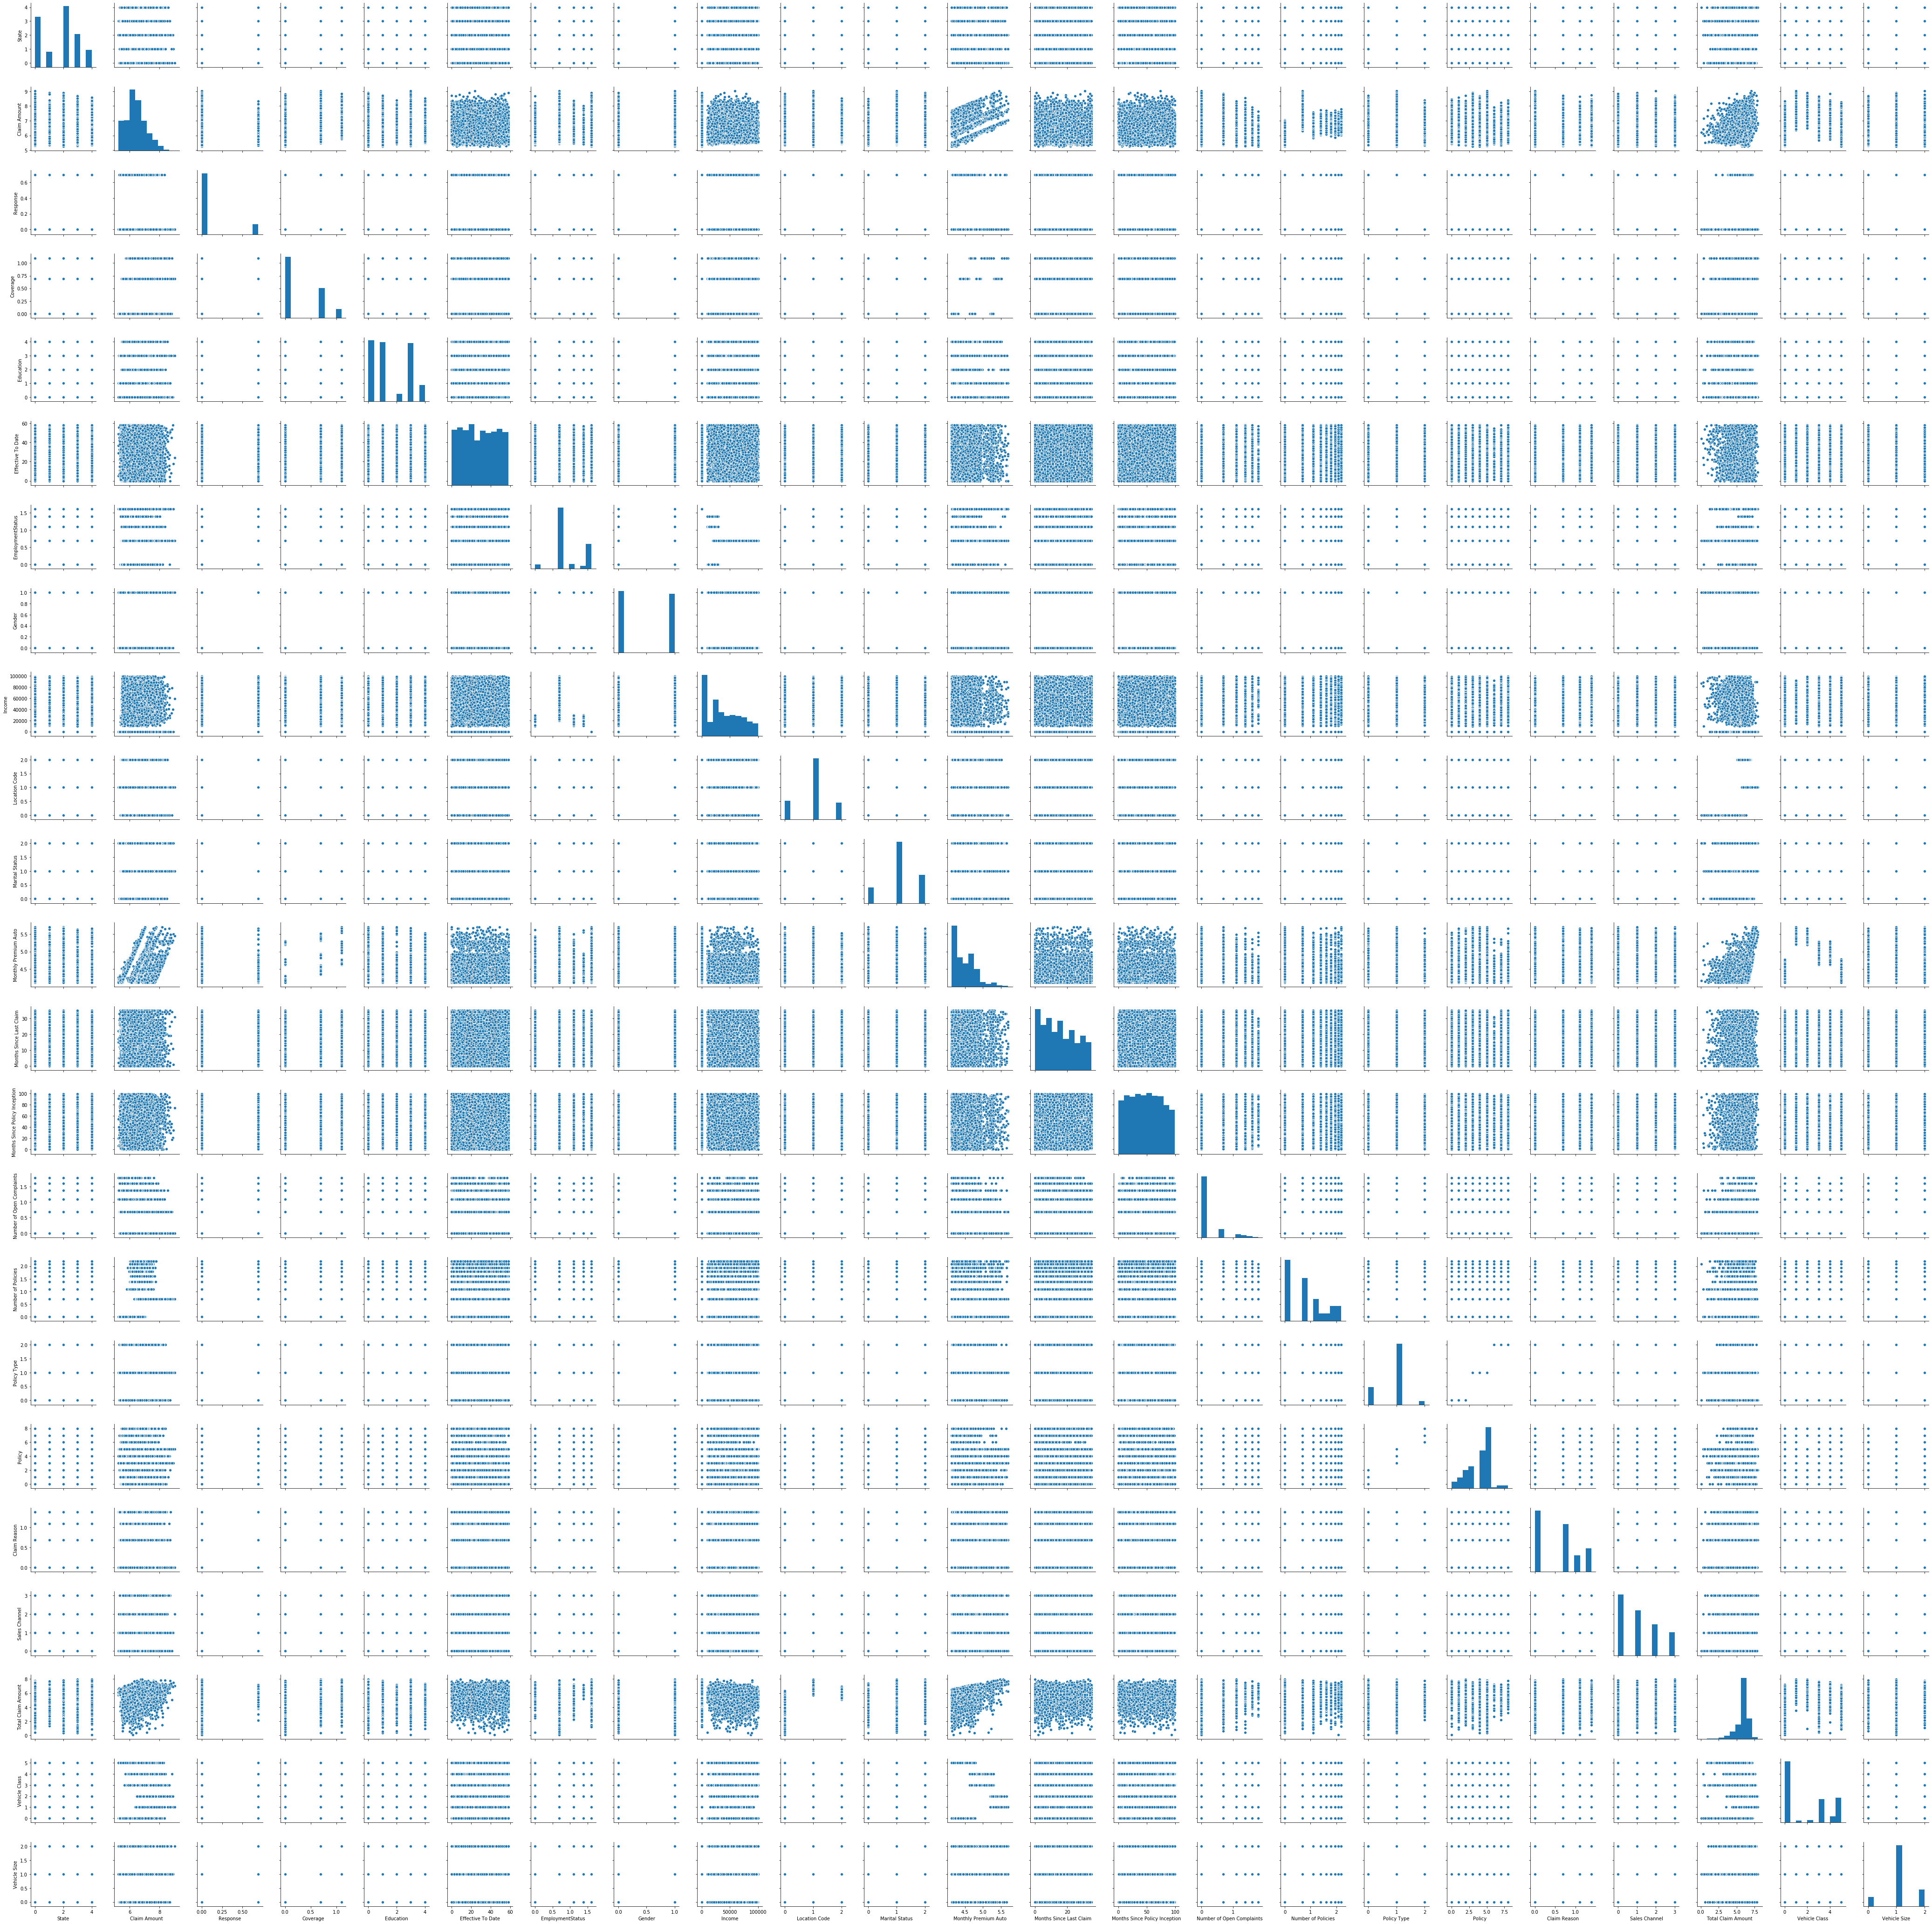

In [63]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

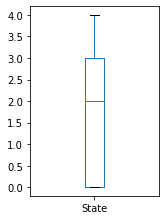

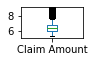

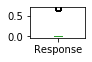

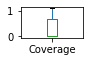

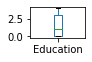

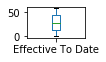

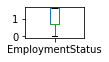

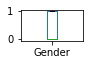

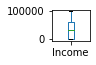

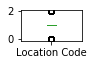

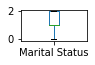

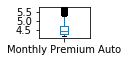

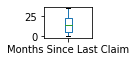

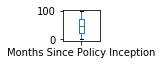

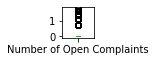

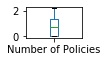

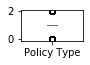

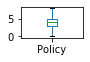

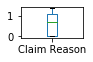

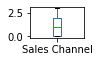

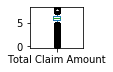

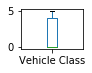

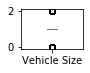

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

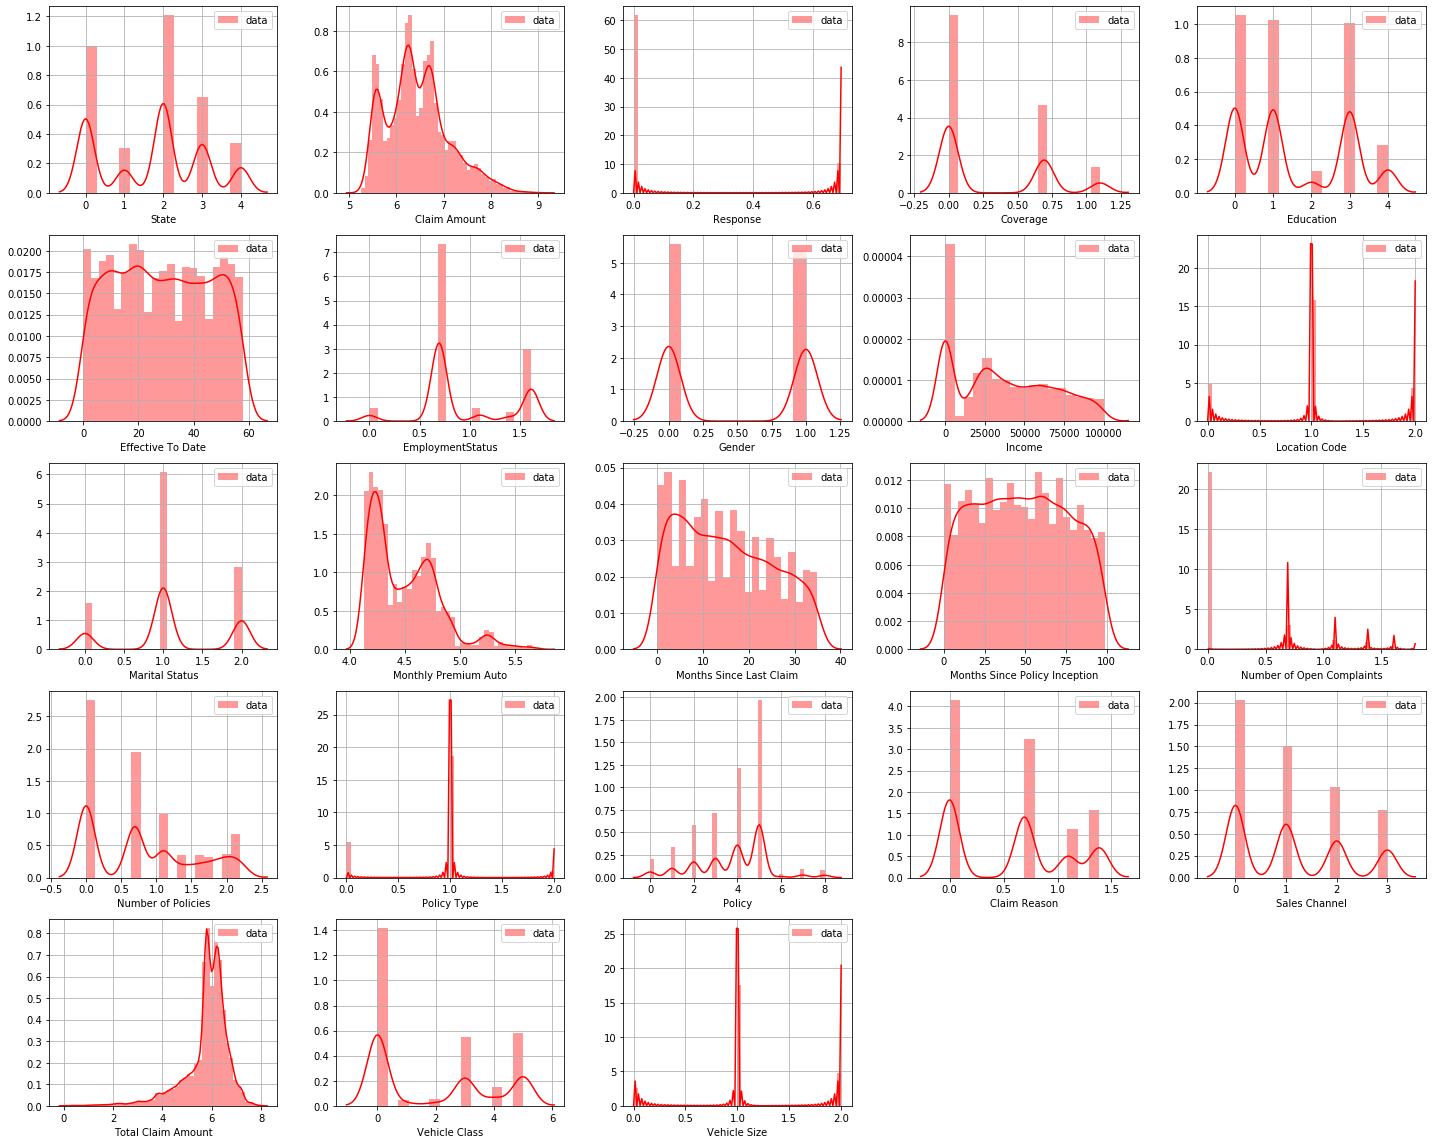

In [65]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### LinePlot

In [66]:
data.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

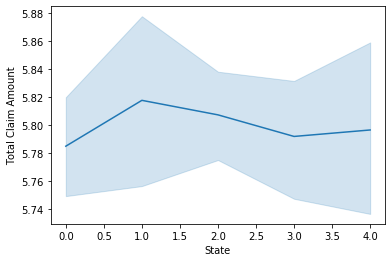

In [67]:
#Lets check the how State is changing with respect to Total Claim Amount
sns.lineplot(data["State"],data["Total Claim Amount"])
plt.show()

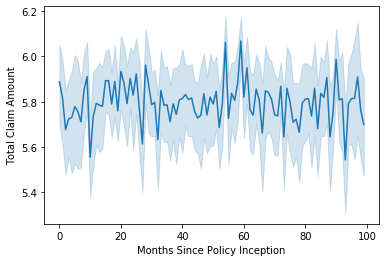

In [68]:
#Lets check the how Months Since Policy Inception is changing with respect to Total Claim Amount
sns.lineplot(data["Months Since Policy Inception"],data["Total Claim Amount"])
plt.show()

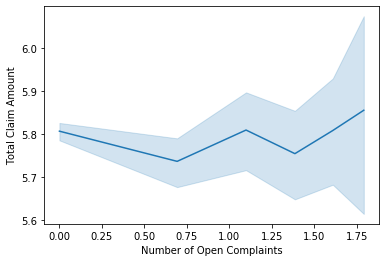

In [69]:
#Lets check the how Number of Open Complaints is changing with respect to Total Claim Amount
sns.lineplot(data["Number of Open Complaints"],data["Total Claim Amount"])
plt.show()

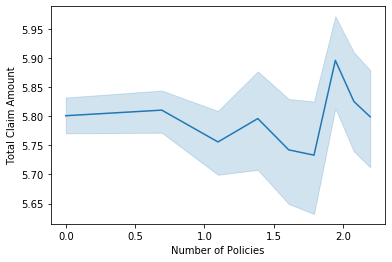

In [70]:
#Lets check the how Number of Policies is changing with respect to Total Claim Amount
sns.lineplot(data["Number of Policies"],data["Total Claim Amount"])
plt.show()

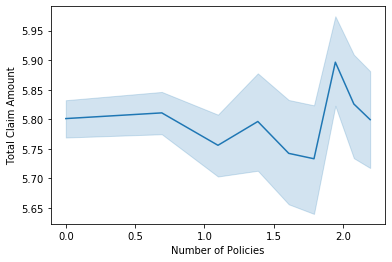

In [71]:
#Lets check the how Number of Policies is changing with respect to Total Claim Amount
sns.lineplot(data["Number of Policies"],data["Total Claim Amount"])
plt.show()

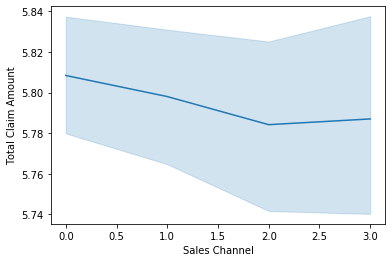

In [72]:
#Lets check the how Number of Policies is changing with respect to Total Claim Amount
sns.lineplot(data["Sales Channel"],data["Total Claim Amount"])
plt.show()

### Plotting Data using Scatter Plot

In [73]:
data.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

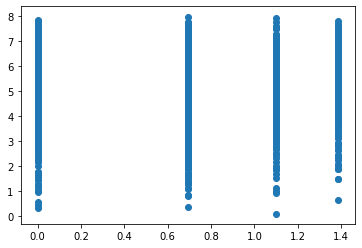

In [74]:
plt.scatter(data['Claim Reason'],data['Total Claim Amount'])

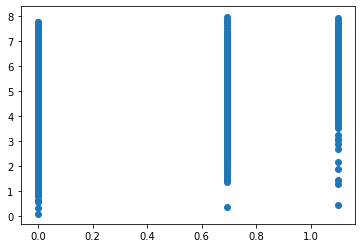

In [75]:
plt.scatter(data['Coverage'],data['Total Claim Amount'])

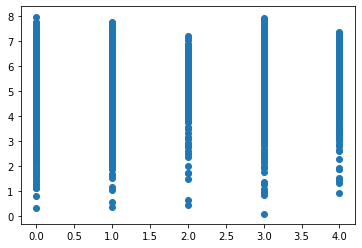

In [76]:
plt.scatter(data['Education'],data['Total Claim Amount'])

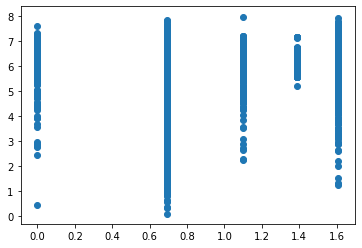

In [77]:
plt.scatter(data['EmploymentStatus'],data['Total Claim Amount'])

### Column Plot

In [78]:
collist = data.columns.values
ncols=12
nrows=10

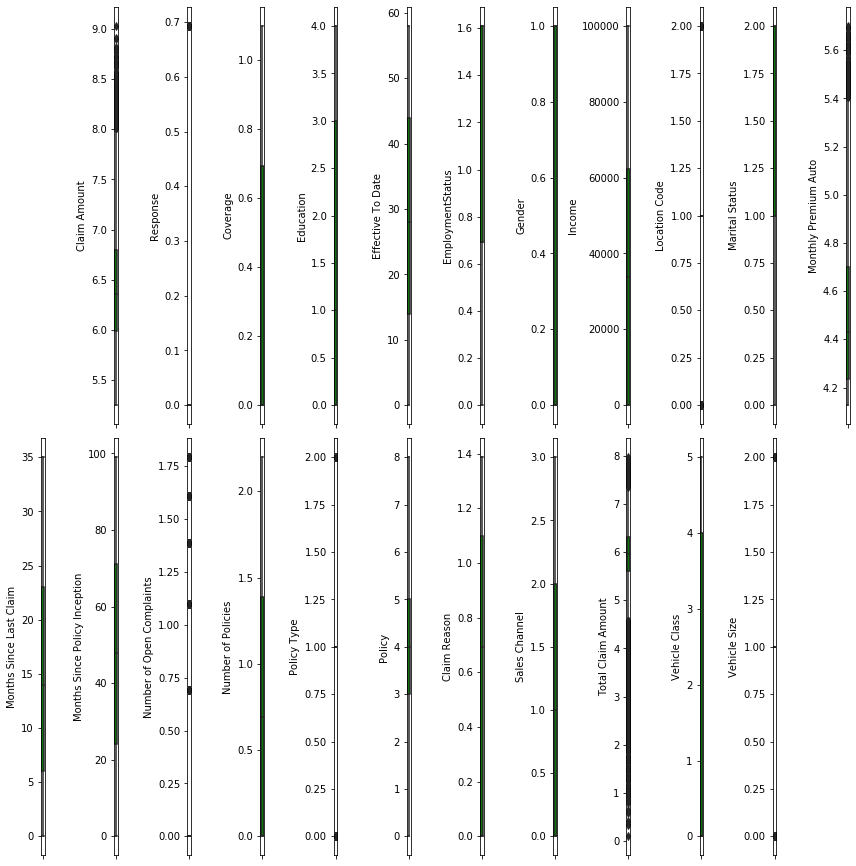

In [79]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [80]:
data

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1      5.625287  0.000000  0.000000          0                 47   
1         3      6.549584  0.000000  0.693147          0                 24   
2         4      7.162198  0.000000  1.098612          0                 41   
3         2      6.640642  0.000000  0.000000          0                 12   
4         1      5.643216  0.000000  0.000000          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2      7.758589  0.000000  0.000000          0                 32   
9130      2      5.738670  0.693147  0.693147          1                 34   
9131      2      6.706115  0.000000  0.693147          0                 55   
9132      2      6.624655  0.000000  0.693147          1                 52   
9133      2      5.569045  0.000000  0.693147          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0             0.693147       0   56274              1  ...   
1             1.609438       0       0              1  ...   
2             0.693147       0   48767              1  ...   
3             1.609438       1       0              1  ...   
4             0.693147       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129          0.693147       1   71941              2  ...   
9130          0.693147       0   21604              1  ...   
9131          1.609438       1       0              1  ...   
9132          0.693147       1   21941              1  ...   
9133          1.609438       1       0              1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
0                                 5                   0.000000   
1                                42                   0.000000   
2                                38                   0.000000   
3                                65                   0.000000   
4                                44                   0.000000   
...                             ...                        ...   
9129                             89                   0.000000   
9130                             28                   0.000000   
9131                             37                   1.386294   
9132                              3                   0.000000   
9133                             90                   0.000000   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
0               0.000000            0       2      0.000000              0   
1               2.079442            1       5      1.386294              0   
2               0.693147            1       5      0.000000              0   
3               1.945910            0       1      0.000000              2   
4               0.000000            1       3      0.000000              0   
...                  ...          ...     ...           ...            ...   
9129            0.693147            1       3      0.693147              3   
9130            0.000000            0       2      0.000000              1   
9131            0.693147            0       1      0.000000              1   
9132            1.098612            1       4      1.386294              1   
9133            0.000000            0       2      1.098612              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
0               5.955348              5             1  
1               7.032152              0             1  
2               6.341192              5             1  
3               6.274539              3             1  
4               4.935415              0             1  
...                  ...            ...           ...  
9129            5.294484              0             1  
9130            5.940697              0             1  
9131            6.674290              0             1  
9132            6.5398

In [81]:
X = data.drop("Total Claim Amount", axis=1)

In [82]:
X

State  Claim Amount  Response  Coverage  Education  Effective To Date  \
0         1      5.625287  0.000000  0.000000          0                 47   
1         3      6.549584  0.000000  0.693147          0                 24   
2         4      7.162198  0.000000  1.098612          0                 41   
3         2      6.640642  0.000000  0.000000          0                 12   
4         1      5.643216  0.000000  0.000000          0                 52   
...     ...           ...       ...       ...        ...                ...   
9129      2      7.758589  0.000000  0.000000          0                 32   
9130      2      5.738670  0.693147  0.693147          1                 34   
9131      2      6.706115  0.000000  0.693147          0                 55   
9132      2      6.624655  0.000000  0.693147          1                 52   
9133      2      5.569045  0.000000  0.693147          1                 36   

      EmploymentStatus  Gender  Income  Location Code  ...  \
0             0.693147       0   56274              1  ...   
1             1.609438       0       0              1  ...   
2             0.693147       0   48767              1  ...   
3             1.609438       1       0              1  ...   
4             0.693147       1   43836              0  ...   
...                ...     ...     ...            ...  ...   
9129          0.693147       1   71941              2  ...   
9130          0.693147       0   21604              1  ...   
9131          1.609438       1       0              1  ...   
9132          0.693147       1   21941              1  ...   
9133          1.609438       1       0              1  ...   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies  Policy Type  Policy  \
0                      0.000000            0.000000            0       2   
1                      0.000000            2.079442            1       5   
2                      0.000000            0.693147            1       5   
3                      0.000000            1.945910            0       1   
4                      0.000000            0.000000            1       3   
...                         ...                 ...          ...     ...   
9129                   0.000000            0.693147            1       3   
9130                   0.000000            0.000000            0       2   
9131                   1.386294            0.693147            0       1   
9132                   0.000000            1.098612            1       4   
9133                   0.000000            0.000000            0       2   

      Claim Reason  Sales Channel  Vehicle Class  Vehicle Size  
0         0.000000              0              5             1  
1         1.386294              0              0             1  
2         0.000000              0              5             1  
3         0.000000              2              3             1  
4         0.000000              0              0             1  
...            ...            ...            ...           ...  
9129      0.693147              3              0             1  
9130      0.000000              1              0             1  
9131      0.000000              1            

In [83]:
Y = data["Total Claim Amount"]
Y

0       5.955348
1       7.032152
2       6.341192
3       6.274539
4       4.935415
          ...   
9129    5.294484
9130    5.940697
9131    6.674290
9132    6.539875
9133    5.915123
Name: Total Claim Amount, Length: 9134, dtype: float64

In [84]:
X.shape

(9134, 22)

In [85]:
Y.shape

(9134,)

In [86]:
Y = Y.values.reshape(-1,1)

In [87]:
Y

array([[5.95534799],
       [7.03215189],
       [6.34119184],
       ...,
       [6.67428987],
       [6.53987493],
       [5.91512331]])

In [88]:
Y.shape

(9134, 1)

#### Applying Linear Regression

In [89]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [90]:
train_X.shape

(6119, 22)

In [91]:
train_Y.shape

(6119, 1)

In [92]:
test_X.shape

(3015, 22)

In [93]:
test_Y.shape

(3015, 1)

In [94]:
lg = LinearRegression()

In [95]:
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
lg.coef_

array([[ 1.87931174e-03,  1.06645130e-03,  2.50002193e-01,
        -2.55168062e-02,  3.77625066e-03, -1.08842462e-04,
         1.22910941e-01,  1.29213180e-01, -7.82238654e-06,
         7.15483145e-01,  9.80604374e-02,  1.11579743e+00,
        -1.69493230e-03, -1.74026794e-04, -4.44016173e-05,
        -4.67470572e-03,  3.00873803e-02, -3.58269420e-03,
         1.81265364e-02,  7.12997749e-03,  4.35170646e-04,
         1.58466340e-01]])

In [97]:
lg.intercept_

array([-0.1044175])

In [98]:
lg.score(train_X,train_Y)

0.5074180037928111

In [99]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[6.12706954]
 [5.03079751]
 [6.05925068]
 ...
 [5.8306249 ]
 [4.79520986]
 [5.41477259]]
actual price [[5.99796291]
 [6.1253185 ]
 [6.28428392]
 ...
 [6.08231164]
 [5.11651398]
 [5.74620319]]


In [100]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.4450039404777354
Mean sqaured error: 0.3772862103713796
Root mean squared error: 0.6142362822004083


#### Boost through GradientBoostRegressor By using Parameters

In [101]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.815362258896174
Mean squared error: 0.19
R2 Score: 0.76


#### Lets Visualize the Goodness of the Prediction

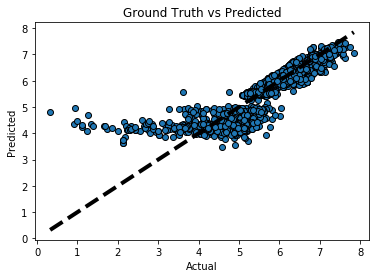

In [103]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Linear Regression using Recursion

In [104]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [106]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.5088865015816393
r2 score corresponding to  43 is 0.47584657440039546
r2 score corresponding to  44 is 0.5203583694142155
r2 score corresponding to  45 is 0.5093591770303808
r2 score corresponding to  46 is 0.5180480651164563
r2 score corresponding to  47 is 0.5271886320956947
r2 score corresponding to  48 is 0.5097024762704516
r2 score corresponding to  49 is 0.5044228660196878
r2 score corresponding to  50 is 0.509304725982558
r2 score corresponding to  51 is 0.520372624125962
r2 score corresponding to  52 is 0.5108032211573776
r2 score corresponding to  53 is 0.5193683512028751
r2 score corresponding to  54 is 0.5151469409624987
r2 score corresponding to  55 is 0.530662765559389
r2 score corresponding to  56 is 0.49109391511186307
r2 score corresponding to  57 is 0.509022766964163
r2 score corresponding to  58 is 0.5080466836244244
r2 score corresponding to  59 is 0.5087724808467542
r2 score corresponding to  60 is 0.5211304721552747
r2 score corre

### KNN Model

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.82
R2 Score of linear svc: 0.02


### Lets use grid_search to find optimal value of n_neighbors for KNN Model

In [108]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 29}

In [109]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=29)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.09910491122646614
r2 score corresponding to  43 is 0.11794189955416645
r2 score corresponding to  44 is 0.09491117463903231
r2 score corresponding to  45 is 0.10720436158051416
r2 score corresponding to  46 is 0.10784083221389373
r2 score corresponding to  47 is 0.11840959757368252
r2 score corresponding to  48 is 0.09979182108618279
r2 score corresponding to  49 is 0.09525173004233856
r2 score corresponding to  50 is 0.13102606626407853
r2 score corresponding to  51 is 0.10398106727397904
r2 score corresponding to  52 is 0.09025397025007464
r2 score corresponding to  53 is 0.10953631710669598
r2 score corresponding to  54 is 0.09724756398375856
r2 score corresponding to  55 is 0.11396958532860113
r2 score corresponding to  56 is 0.09272030950610832
r2 score corresponding to  57 is 0.1264465631874785
r2 score corresponding to  58 is 0.10708854392505185
r2 score corresponding to  59 is 0.10957695388499611
r2 score corresponding to  60 is 0.098791252275

In [110]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.5083250064770997
Standard deviation in r2 scorefor Linear Regression: 0.012642382942611951

Mean r2 score for KNN Regression:  0.11044977711648245
Stadard deviation in r2 score for KNN Regression: 0.013482121317843099


### Boosting Linear Regression

In [111]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6503595731583102
Standard deviation in r2 score for ada boosting Regression:  0.00943633177815558


### Boosting KNN model

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6454302611491733
Standard deviation in r2 score for ada boosting Regression:  0.010634573497228721


#### Lets check lasso regression and best value of alpha

In [113]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [114]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5085425211393846
Standard deviation in r2 score for Lasso Regression:  0.01250097509096295


### Boosting Lasso Regressor

In [115]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6325006050057109
Standard deviation in r2 score for ada boosting Regression:  0.023645452622771023


### Support Vector Regression

In [116]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.74
R2 Score of linear svc: 0.13


### Boosting Support Vector Machine

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6515919235948109
Standard deviation in r2 score for ada boosting Regression:  0.01669567408982579


### Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


#### Lets Visualize the Goodness of the Prediction

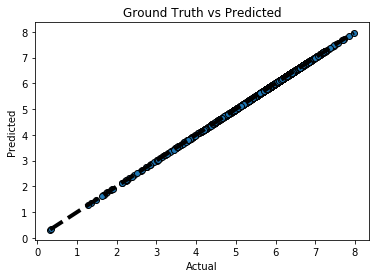

In [120]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_pred4, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [121]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result price:",y_pred4)
print("actual price",test_Y)

Predicted result price: [5.88903277 6.55022282 5.15459805 ... 6.2978457  6.15060277 6.7026972 ]
actual price [[5.88903277]
 [6.55022282]
 [5.15459805]
 ...
 [6.2978457 ]
 [6.15060277]
 [6.7026972 ]]


### Boosting Decision Tree

In [122]:
from sklearn.ensemble import AdaBoostRegressor

In [123]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7187367978257928
Standard deviation in r2 score for ada boosting Regression:  0.012432982837361342


### Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.23
R2 Score : 0.72


#### Random Forest Regressor with GridSearchCV

In [125]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [126]:
n_features = X.shape[1]

In [127]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 6, 'max_depth': 13}


In [128]:
rf_gss = RandomForestRegressor(max_features = 6, max_depth = 20)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7471476946973812
Standard deviation in r2 score for ada boosting Regression:  0.01183758624872381


#### Boosting RandomForestRegressor

In [129]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7578249958034133
Standard deviation in r2 score for ada boosting Regression:  0.01385663228584414


#### NOTE::All models,dtregressor gives the Highest r2 score(1) and mean squared error is zero so we are going to save this model

In [130]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'Automobile Insurance.pkl')

['Automobile Insurance.pkl']

### Auto Insurance Fraud

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [132]:
data = pd.read_csv('Automobile_insurance_fraud.csv')
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

### Exploratory Data Analysis

In [133]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [134]:
data.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

#### Lets check the null values without using visualization

In [135]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

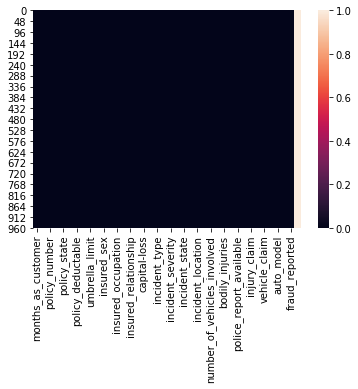

In [136]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

### Here _c39 Columns has All Values are Null so deleting this column

In [137]:
data.drop("_c39", axis=1,inplace=True)

In [138]:
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                       ?               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       ?              87200   
996       608177  ...         3                       ?             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                       ?               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [139]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

#### Let's Check the uniqueness of All Columns and take Apropriate Action

In [140]:
data['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

In [141]:
data['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [142]:
data['policy_number'].unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

#### Here All values of Policy Numbers are unique so It would not be useful to predict the out so I am deleting this column  

In [143]:
data.drop("policy_number", axis=1,inplace=True)

In [144]:
data

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... witnesses police_report_available total_claim_amount  \
0          MALE  ...         2                     YES              71610   
1          MALE  ...         0                       ?               5070   
2        FEMALE  ...         3                      NO              34650   
3        FEMALE  ...         2                      NO              63400   
4          MALE  ...         1                      NO               6500   
..          ...  ...       ...                     ...                ...   
995      FEMALE  ...         1                       ?              87200   
996      FEMALE  ...         3                       ?             108480   
997      FEMALE  ...         3                     YES              67500   
998        MALE  ...         1                     YES              46980   
999      FEMALE  ...         3                       ?               5060   

    injury_claim  property_claim  vehicle_claim   auto_make auto_model  \
0           6510           13020          52080        Saab        92x   
1            780             780           3510    Mercedes       E400   
2           7700            3850          23100       Dodge        RAM   
3           6340            6340          50720   Chevrolet      Tahoe   
4           1300             650           4550      Accura        RSX   
..           ...             ...            ...         ...        ...   
995        17440            8720          61040       Honda     Accord   
996        18080           18080          72320  Volkswagen     Passat   
997         7500            7500          52500      Suburu    Impreza   
998         5220            5220          36540        Audi         A5   
999          460             920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      2007              N  

[100

In [145]:
data['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

#### Here All values of policy_bind_date are unique so It would not be useful to predict the output so I am deleting this column 

In [146]:
data.drop("policy_bind_date", axis=1,inplace=True)

In [147]:
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... witnesses police_report_available  \
0                        MD  ...         2                     YES   
1                        MD  ...         0                       ?   
2                       PhD  ...         3                      NO   
3                       PhD  ...         2                      NO   
4                 Associate  ...         1                      NO   
..                      ...  ...       ...                     ...   
995                 Masters  ...         1                       ?   
996                     PhD  ...         3                       ?   
997                 Masters  ...         3                     YES   
998               Associate  ...         1                     YES   
999               Associate  ...         3                       ?   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              Y  
1      Mercedes       E400      2007              Y  
2         Dodge        RAM      2007              N  
3     Chevrolet      Tahoe      2014              Y  
4        Accura        RSX      2009              N  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      1996              N  
998        Audi         A5   

In [148]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [149]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [150]:
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [151]:
data['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [152]:
data['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

In [153]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [154]:
data['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [155]:
data['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [156]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [157]:
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [158]:
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [159]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [160]:
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [161]:
data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [162]:
data['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

In [163]:
data['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [164]:
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [165]:
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [166]:
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [167]:
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [168]:
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [169]:
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [170]:
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [171]:
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [172]:
data['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

#### Here all values of Incident Locations are Unique and It wouldn't be useful to predict the output hence we are dropping this column

In [173]:
data.drop("incident_location", axis=1,inplace=True)

In [174]:
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... witnesses police_report_available  \
0                        MD  ...         2                     YES   
1                        MD  ...         0                       ?   
2                       PhD  ...         3                      NO   
3                       PhD  ...         2                      NO   
4                 Associate  ...         1                      NO   
..                      ...  ...       ...                     ...   
995                 Masters  ...         1                       ?   
996                     PhD  ...         3                       ?   
997                 Masters  ...         3                     YES   
998               Associate  ...         1                     YES   
999               Associate  ...         3                       ?   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              Y  
1      Mercedes       E400      2007              Y  
2         Dodge        RAM      2007              N  
3     Chevrolet      Tahoe      2014              Y  
4        Accura        RSX      2009              N  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      1996              N  
998        Audi         A5   

In [175]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [176]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [177]:
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [178]:
data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [179]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

#### Replacing ? with 0

In [180]:
data.replace('?', 0,inplace=True)

In [181]:
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... witnesses police_report_available  \
0                        MD  ...         2                     YES   
1                        MD  ...         0                       0   
2                       PhD  ...         3                      NO   
3                       PhD  ...         2                      NO   
4                 Associate  ...         1                      NO   
..                      ...  ...       ...                     ...   
995                 Masters  ...         1                       0   
996                     PhD  ...         3                       0   
997                 Masters  ...         3                     YES   
998               Associate  ...         1                     YES   
999               Associate  ...         3                       0   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              Y  
1      Mercedes       E400      2007              Y  
2         Dodge        RAM      2007              N  
3     Chevrolet      Tahoe      2014              Y  
4        Accura        RSX      2009              N  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      1996              N  
998        Audi         A5   

#### Convert the Dataset to Numeric(boolean) Format

In [182]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [183]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [184]:
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

    insured_education_level  ... witnesses police_report_available  \
0                        MD  ...         2                     YES   
1                        MD  ...         0                       0   
2                       PhD  ...         3                      NO   
3                       PhD  ...         2                      NO   
4                 Associate  ...         1                      NO   
..                      ...  ...       ...                     ...   
995                 Masters  ...         1                       0   
996                     PhD  ...         3                       0   
997                 Masters  ...         3                     YES   
998               Associate  ...         1                     YES   
999               Associate  ...         3                       0   

    total_claim_amount  injury_claim  property_claim vehicle_claim  \
0                71610          6510           13020         52080   
1                 5070           780             780          3510   
2                34650          7700            3850         23100   
3                63400          6340            6340         50720   
4                 6500          1300             650          4550   
..                 ...           ...             ...           ...   
995              87200         17440            8720         61040   
996             108480         18080           18080         72320   
997              67500          7500            7500         52500   
998              46980          5220            5220         36540   
999               5060           460             920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              1  
1      Mercedes       E400      2007              1  
2         Dodge        RAM      2007              0  
3     Chevrolet      Tahoe      2014              1  
4        Accura        RSX      2009              0  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              0  
996  Volkswagen     Passat      2015              0  
997      Suburu    Impreza      1996              0  
998        Audi  

In [185]:
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [186]:
data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [187]:
data['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

#### Here auto_make,auto_model and auto_year are not necessary to predict the output(fraud_reported) so we are deleting this column

In [188]:
data.drop("auto_make", axis=1,inplace=True)

In [189]:
data.drop("auto_model", axis=1,inplace=True)

In [190]:
data.drop("auto_year", axis=1,inplace=True)

In [191]:
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

    insured_education_level  ... number_of_vehicles_involved property_damage  \
0                        MD  ...                           1             YES   
1                        MD  ...                           1               0   
2                       PhD  ...                           3              NO   
3                       PhD  ...                           1               0   
4                 Associate  ...                           1              NO   
..                      ...  ...                         ...             ...   
995                 Masters  ...                           1             YES   
996                     PhD  ...                           1             YES   
997                 Masters  ...                           3               0   
998               Associate  ...                           1               0   
999               Associate  ...                           1               0   

    bodily_injuries  witnesses  police_report_available total_claim_amount  \
0                 1          2                      YES              71610   
1                 0          0                        0               5070   
2                 2          3                       NO              34650   
3                 1          2                       NO              63400   
4                 0          1                       NO               6500   
..              ...        ...                      ...                ...   
995               0          1                        0              87200   
996               2          3                        0             108480   
997               2          3                      YES              67500   
998               0          1                      YES              46980   
999               0          3                        0               5060   

    injury_claim property_claim vehicle_claim fraud_reported  
0           6510          13020         52080              1  
1            780            780          3510              1  
2           7700           3850         23100              0  
3           6340           6340         50720              1  
4           1300          

In [192]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [193]:
#Converting All Comuns into number
data = pd.get_dummies(data)

In [194]:
data

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0                 0       466132            1          53300             0   
1           5000000       468176            1              0             0   
2           5000000       430632            0          35100             0   
3           6000000       608117            0          48900        -62400   
4           6000000       610706            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995               0       431289            0              0             0   
996               0       608177            0          70900             0   
997         3000000       442797            0          35100             0   
998         5000000       441714            1              0             0   
999               0       612260            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                        0   
1                           8  ...                        0   
2                           7  ...                        0   
3                           5  ...                        0   
4                          20  ...                        0   
..                        ...  ...                      ...   
995                        20  ...                        0   
996                        23  ...                        1   
997                         4  ...                        0   
998                         2  ...                        0   
999                         6  ...                        0   

     incident_city_Northbrook  incident_city_Riverwood  \
0                           0                        0   
1                           0                        1   
2                           0                        0   
3                           0                        0   
4                           0                        0   
..                        ...                      ...   
995                         1                        0   
996                         0                        0   
997                         0                        0   
998                         0                        0   
999                         0                        0   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                            0                  0                   0   
1                            0                  1                   0   
2                            0                  0                   1   
3                            0                  1                   0   
4                            0                  0                   1   
..                         ...                ...                 ...   
995                          0                  0                   0   
996                          0                  0                   0   
997                          0                  1                   

In [195]:
data['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [196]:
data['fraud_reported'].unique()

array([1, 0], dtype=int64)

In [197]:
data.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
                                ...   
property_damage_NO               uint8
property_damage_YES              uint8
police_report_available_0        uint8
police_report_available_NO       uint8
police_report_available_YES      uint8
Length: 168, dtype: object

In [198]:
data.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  insured_sex  \
count            1000.000000    1.000000e+03    1000.000000  1000.000000   
mean             1256.406150    1.101000e+06  501214.488000     0.463000   
std               244.167395    2.297407e+06   71701.610941     0.498879   
min               433.330000   -1.000000e+06  430104.000000     0.000000   
25%              1089.607500    0.000000e+00  448404.500000     0.000000   
50%              1257.200000    0.000000e+00  466445.500000     0.000000   
75%              1415.695000    0.000000e+00  603251.000000     1.000000   
max              2047.590000    1.000000e+07  620962.000000     1.000000   

       capital-gains   capital-loss  incident_hour_of_the_day  ...  \
count    1000.000000    1000.000000               1000.000000  ...   
mean    25126.100000  -26793.700000                 11.644000  ...   
std     27872.187708   28104.096686                  6.951373  ...   
min         0.000000 -111100.000000                  0.000000  ...   
25%         0.000000  -51500.000000                  6.000000  ...   
50%         0.000000  -23250.000000                 12.000000  ...   
75%     51025.000000       0.000000                 17.000000  ...   
max    100500.000000       0.000000                 23.000000  ...   

       incident_city_Northbend  incident_city_Northbrook  \
count              1000.000000                1000.00000   
mean                  0.145000                   0.12200   
std                   0.352277                   0.32745   
min                   0.000000                   0.00000   
25%                   0.000000                   0.00000   
50%                   0.000000                   0.00000   
75%                   0.000000                   0.00000   
max                   1.000000                   1.00000   

       incident_city_Riverwood  incident_city_Springfield  property_damage_0  \
count              1000.000000                1000.000000         1000.00000   
mean                  0.134000                   0.157000            0.36000   
std                   0.340823                   0.363983            0.48024   
min                   0.000000                   0.000000            0.00000   
25%                   0.000000                   0.000000            0.00000   
50%                   0.000000                   0.000000            0.00000   
75%                   0.000000                   0.000000            1.00000   
max                   1.000000                   1.000000            1.00000   

       property_damage_NO  property_damage_YES  police_report_available_0  \
count         1000.000000          1000.000000                1000.000000   
mean             0.338000             0.302000                   0.343000   
std              0.473265             0.459355                   0.474949   
min              0.000000             0.000000                   0.000000   
25%              0.000000             0.000000                   0.000000   
50%              0.000000             0.000000                   0.000000   
75%              1.000000             1.000000                   1.000000   
max              1.000000             1.000000                   1.000000   

       police_report_available_NO  police_report_available_YES  
count                 1000.000000                  1000.000000  
mean                     0.343000                     0

In [199]:
dfcor = data.corr()
dfcor

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
...                                         ...       ...                ...   
property_damage_NO                     0.001425  0.004067          -0.001618   
property_damage_YES                    0.005488 -0.003408           0.015770   
police_report_available_0             -0.051763 -0.045002          -0.014288   
police_report_available_NO             0.073415  0.064987          -0.022899   
police_report_available_YES           -0.022146 -0.020441           0.038036   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
...                                            ...             ...   
property_damage_NO                        0.006875        0.050508   
property_damage_YES                       0.080738       -0.076358   
police_report_available_0                -0.001740        0.051701   
police_report_available_NO               -0.019766       -0.007929   
police_report_available_YES               0.021998       -0.044771   

                             insured_zip  insured_sex  capital-gains  \
months_as_customer              0.017895     0.060925       0.006399   
age                             0.025604     0.073337      -0.007075   
policy_deductable               0.004545    -0.009733       0.035212   
policy_annual_premium           0.032354     0.038853      -0.013738   
umbrella_limit                  0.019671     0.010688      -0.047268   
...                                  ...          ...            ...   
property_damage_NO              0.057208    -0.002094       0.042236   
property_damage_YES             0.023861     0.026969      -0.000616   
police_report_available_0       0.039665    -0.028766       0.008231   
police_report_available_NO     -0.049287     0.021930       0.004420   
police_report_available_YES     0.009841     0.006992      -0.012939   

                             capital-loss  incident_hour_of_the_day  ...  \
months_as_customer               0.020209                  0.070639  ...   
age                              0.007368                  0.087161  ...   
policy_deductable               -0.023544                  0.060935  ...   
policy_annual_premium            0.023547                 -0.001578  ...   
umbrella_limit                  -0.024056                 -0.023257  ...   
...                                   ...                       ...  ...   
property_damage_NO              -0.023957                 -0.004160  ...   
property_damage_YES              0.016981                  0.064425  ...   
police_report_available_0        0.008065                 -0.029983  ...   
police_report_available_NO       0.030315                 -0.009669  ...   
police_report_available_YES     -0.039256                  0.040558  ...   

                             incident_city_Northbend  \
months_as_customer                          0.018258   
age                                         0.012292   
policy_deductable                           0.003622   
policy_annual_premium                      -0.005006   
umbrella_limit                             -0.024298   
...                                              ...   
property_damage_NO                         -0.006064   
p

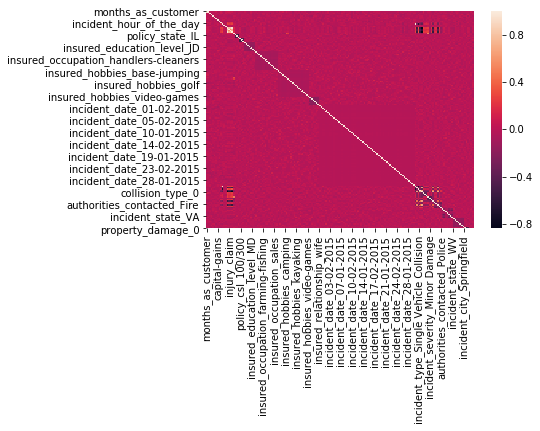

In [200]:
sns.heatmap(dfcor)

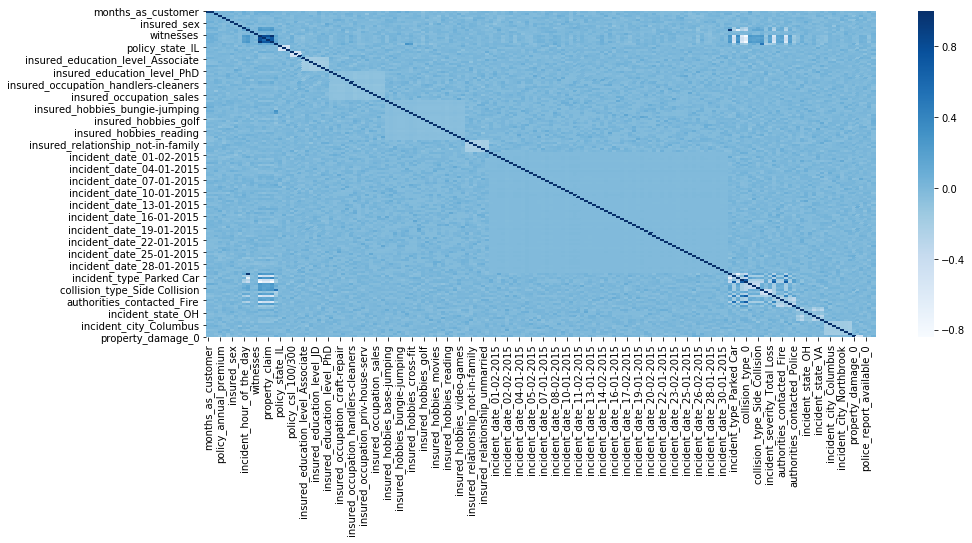

In [201]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

In [202]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1000, 168)
(0, 168)


#### Checking Skewness and Removing it

In [203]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
                                 ...   
property_damage_NO             0.685977
property_damage_YES            0.863806
police_report_available_0      0.662448
police_report_available_NO     0.662448
police_report_available_YES    0.802728
Length: 168, dtype: float64

In [204]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [205]:
#Lets Again Check the Skewness
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
                                 ...   
property_damage_NO             0.685977
property_damage_YES            0.863806
police_report_available_0      0.662448
police_report_available_NO     0.662448
police_report_available_YES    0.802728
Length: 168, dtype: float64

### LinePlot

In [206]:
data.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_0', 'property_damage_NO', 'property_damage_YES',
       'police_report_available_0', 'police_report_available_NO',
       'police_report_available_YES'],
      dtype='object', length=168)

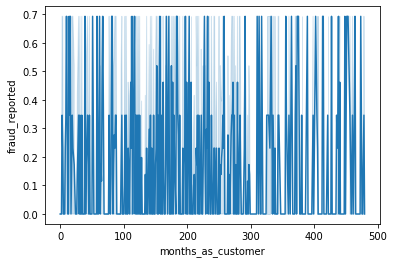

In [207]:
#Lets check the how months_as_customer is changing with respect to fraud_reported
sns.lineplot(data["months_as_customer"],data["fraud_reported"])
plt.show()

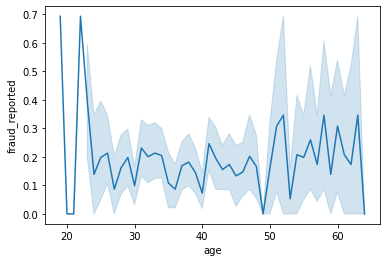

In [208]:
#Lets check the how age is changing with respect to fraud_reported
sns.lineplot(data["age"],data["fraud_reported"])
plt.show()

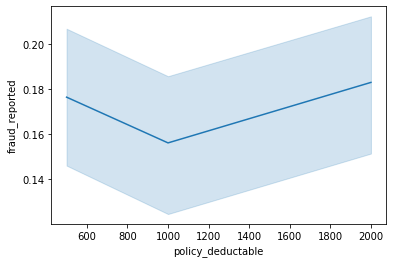

In [209]:
#Lets check the how policy_deductable is changing with respect to fraud_reported
sns.lineplot(data["policy_deductable"],data["fraud_reported"])
plt.show()

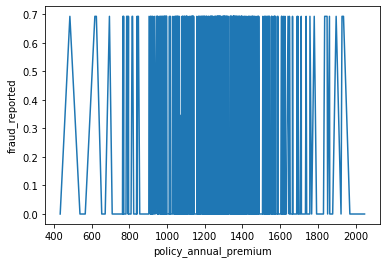

In [210]:
#Lets check the how policy_annual_premium is changing with respect to fraud_reported
sns.lineplot(data["policy_annual_premium"],data["fraud_reported"])
plt.show()

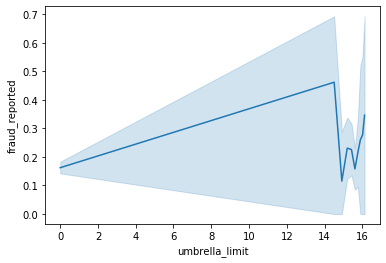

In [211]:
#Lets check the how umbrella_limit is changing with respect to fraud_reported
sns.lineplot(data["umbrella_limit"],data["fraud_reported"])
plt.show()

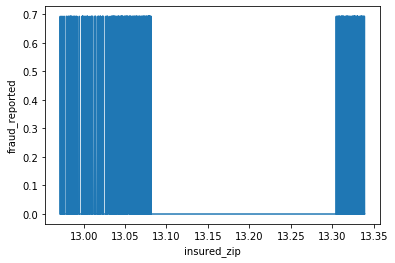

In [212]:
#Lets check the how insured_zip is changing with respect to fraud_reported
sns.lineplot(data["insured_zip"],data["fraud_reported"])
plt.show()

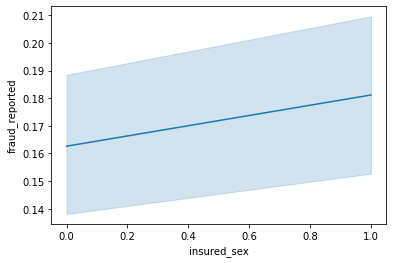

In [213]:
#Lets check the how insured_sex is changing with respect to fraud_reported
sns.lineplot(data["insured_sex"],data["fraud_reported"])
plt.show()

### Plotting Data using Scatter Plot

In [214]:
data.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'incident_city_Northbend', 'incident_city_Northbrook',
       'incident_city_Riverwood', 'incident_city_Springfield',
       'property_damage_0', 'property_damage_NO', 'property_damage_YES',
       'police_report_available_0', 'police_report_available_NO',
       'police_report_available_YES'],
      dtype='object', length=168)

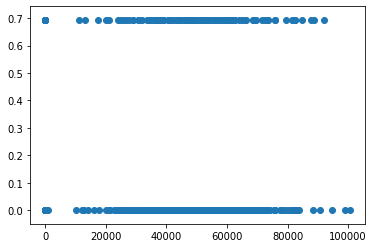

In [215]:
plt.scatter(data['capital-gains'],data['fraud_reported'])

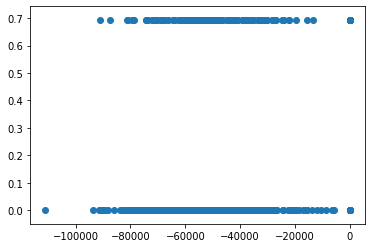

In [216]:
plt.scatter(data['capital-loss'],data['fraud_reported'])

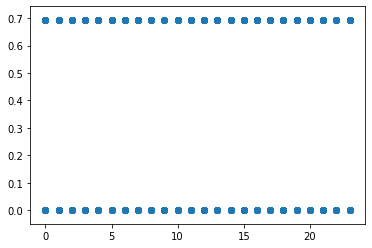

In [217]:
plt.scatter(data['incident_hour_of_the_day'],data['fraud_reported'])

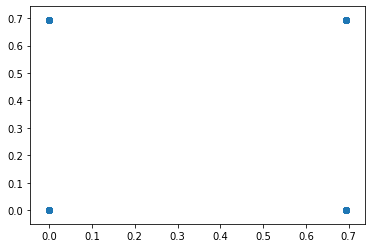

In [218]:
plt.scatter(data['incident_city_Northbend'],data['fraud_reported'])

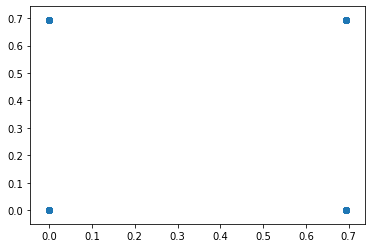

In [219]:
plt.scatter(data['incident_city_Northbrook'],data['fraud_reported'])

In [220]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 1
                              ..
property_damage_NO             0
property_damage_YES            0
police_report_available_0      0
police_report_available_NO     0
police_report_available_YES    0
Length: 168, dtype: int64

In [221]:
data.fillna(0,inplace=True)

In [222]:
data

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0          0.000000    13.052226            1          53300             0   
1         15.424949    13.056602            1              0             0   
2         15.424949    12.973011            0          35100             0   
3         15.607270    13.318124            0          48900        -62400   
4         15.607270    13.322373            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995        0.000000    12.974536            0              0             0   
996        0.000000    13.318223            0          70900             0   
997       14.914123    13.000869            0          35100             0   
998       15.424949    12.998420            1              0             0   
999        0.000000    13.324914            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                 0.000000   
1                           8  ...                 0.000000   
2                           7  ...                 0.000000   
3                           5  ...                 0.000000   
4                          20  ...                 0.000000   
..                        ...  ...                      ...   
995                        20  ...                 0.000000   
996                        23  ...                 0.693359   
997                         4  ...                 0.000000   
998                         2  ...                 0.000000   
999                         6  ...                 0.000000   

     incident_city_Northbrook  incident_city_Riverwood  \
0                    0.000000                 0.000000   
1                    0.000000                 0.693359   
2                    0.000000                 0.000000   
3                    0.000000                 0.000000   
4                    0.000000                 0.000000   
..                        ...                      ...   
995                  0.693359                 0.000000   
996                  0.000000                 0.000000   
997                  0.000000                 0.000000   
998                  0.000000                 0.000000   
999                  0.000000                 0.000000   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                          0.0           0.000000            0.000000   
1                          0.0           0.693359            0.000000   
2                          0.0           0.000000            0.693359   
3                          0.0           0.693359            0.000000   
4                          0.0           0.000000            0.693359   
..                         ...                ...                 ...   
995                        0.0           0.000000            0.000000   
996                        0.0           0.000000            0.000000   
997                        0.0           0.693359            0.00000

#### Separating X and Y Variable

In [223]:
data

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0          0.000000    13.052226            1          53300             0   
1         15.424949    13.056602            1              0             0   
2         15.424949    12.973011            0          35100             0   
3         15.607270    13.318124            0          48900        -62400   
4         15.607270    13.322373            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995        0.000000    12.974536            0              0             0   
996        0.000000    13.318223            0          70900             0   
997       14.914123    13.000869            0          35100             0   
998       15.424949    12.998420            1              0             0   
999        0.000000    13.324914            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                 0.000000   
1                           8  ...                 0.000000   
2                           7  ...                 0.000000   
3                           5  ...                 0.000000   
4                          20  ...                 0.000000   
..                        ...  ...                      ...   
995                        20  ...                 0.000000   
996                        23  ...                 0.693359   
997                         4  ...                 0.000000   
998                         2  ...                 0.000000   
999                         6  ...                 0.000000   

     incident_city_Northbrook  incident_city_Riverwood  \
0                    0.000000                 0.000000   
1                    0.000000                 0.693359   
2                    0.000000                 0.000000   
3                    0.000000                 0.000000   
4                    0.000000                 0.000000   
..                        ...                      ...   
995                  0.693359                 0.000000   
996                  0.000000                 0.000000   
997                  0.000000                 0.000000   
998                  0.000000                 0.000000   
999                  0.000000                 0.000000   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                          0.0           0.000000            0.000000   
1                          0.0           0.693359            0.000000   
2                          0.0           0.000000            0.693359   
3                          0.0           0.693359            0.000000   
4                          0.0           0.000000            0.693359   
..                         ...                ...                 ...   
995                        0.0           0.000000            0.000000   
996                        0.0           0.000000            0.000000   
997                        0.0           0.693359            0.00000

In [224]:
X = data.drop("fraud_reported", axis=1)

In [225]:
X

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
0          0.000000    13.052226            1          53300             0   
1         15.424949    13.056602            1              0             0   
2         15.424949    12.973011            0          35100             0   
3         15.607270    13.318124            0          48900        -62400   
4         15.607270    13.322373            1          66000        -46000   
..              ...          ...          ...            ...           ...   
995        0.000000    12.974536            0              0             0   
996        0.000000    13.318223            0          70900             0   
997       14.914123    13.000869            0          35100             0   
998       15.424949    12.998420            1              0             0   
999        0.000000    13.324914            0              0             0   

     incident_hour_of_the_day  ...  incident_city_Northbend  \
0                           5  ...                 0.000000   
1                           8  ...                 0.000000   
2                           7  ...                 0.000000   
3                           5  ...                 0.000000   
4                          20  ...                 0.000000   
..                        ...  ...                      ...   
995                        20  ...                 0.000000   
996                        23  ...                 0.693359   
997                         4  ...                 0.000000   
998                         2  ...                 0.000000   
999                         6  ...                 0.000000   

     incident_city_Northbrook  incident_city_Riverwood  \
0                    0.000000                 0.000000   
1                    0.000000                 0.693359   
2                    0.000000                 0.000000   
3                    0.000000                 0.000000   
4                    0.000000                 0.000000   
..                        ...                      ...   
995                  0.693359                 0.000000   
996                  0.000000                 0.000000   
997                  0.000000                 0.000000   
998                  0.000000                 0.000000   
999                  0.000000                 0.000000   

     incident_city_Springfield  property_damage_0  property_damage_NO  \
0                          0.0           0.000000            0.000000   
1                          0.0           0.693359            0.000000   
2                          0.0           0.000000            0.693359   
3                          0.0           0.693359            0.000000   
4                          0.0           0.000000            0.693359   
..                         ...                ...                 ...   
995                        0.0           0.000000            0.000000   
996                        0.0           0.000000            0.000000   
997                        0.0           0.693359            0.00000

In [226]:
Y = data["fraud_reported"]
Y

0      0.693147
1      0.693147
2      0.000000
3      0.693147
4      0.000000
         ...   
995    0.000000
996    0.000000
997    0.000000
998    0.000000
999    0.000000
Name: fraud_reported, Length: 1000, dtype: float64

#### Converting the Y Value into 0 and 1 format

In [227]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [228]:
array = data['fraud_reported']

array.shape

(1000,)

In [229]:
le=LabelEncoder()
data1=le.fit_transform(data['fraud_reported'])
data1

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [230]:
data['fraud_reported'] = data1

In [231]:
Y = data["fraud_reported"]
Y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [232]:
Y.shape

(1000,)

In [233]:
Y = Y.values.reshape(-1,1)

In [234]:
Y

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [235]:
Y.shape

(1000, 1)

In [236]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [237]:
train_X.shape

(780, 167)

In [238]:
test_X.shape

(220, 167)

In [239]:
train_Y.shape

(780, 1)

In [240]:
test_Y.shape

(220, 1)

#### Applying Logistic Regression

In [241]:
lg=LogisticRegression()

In [242]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
pred=lg.predict(test_X)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [244]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.7318181818181818


In [245]:
print(confusion_matrix(test_Y,pred))

[[161   1]
 [ 58   0]]


In [246]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       162
           1       0.00      0.00      0.00        58

    accuracy                           0.73       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.73      0.62       220



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [247]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.7510155015501551


In [248]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.753015226895824


### Grid Search Cross Validation for Logistic Regression

In [249]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8153846153846154


In [250]:
lg2=LogisticRegression(C=1.0,penalty="l1")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.8318181818181818


### Boost the Dataset by AdaBoost and GradiantBoost

In [251]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.8884615384615384
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0]


0.7863636363636364

In [252]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.9653846153846154
[1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0]


0.8318181818181818

### Boosting though GradientBoost Regressor By using Parameters

In [253]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [254]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7591828732268716
R2 sq:  0.7591828732268716
Mean squared error: 0.11
Test Variance score: 0.41


### Lets Visualize the Goodness of the Prediction

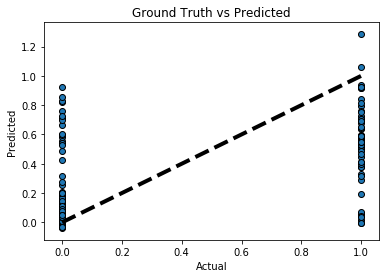

In [255]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [256]:
gb=GaussianNB()
gb.fit(train_X,train_Y)


predgb = gb.predict(test_X)
print(accuracy_score(test_Y,predgb))
print(confusion_matrix(test_Y,predgb))
print(classification_report(test_Y,predgb))

0.6409090909090909
[[116  46]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       162
           1       0.35      0.43      0.39        58

    accuracy                           0.64       220
   macro avg       0.57      0.57      0.57       220
weighted avg       0.67      0.64      0.65       220



### Gaussian NB by using Crossval Score

In [257]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
gbn=GaussianNB()

score=cross_val_score(gbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(gbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.73529412 0.75       0.72058824 0.65671642 0.6119403  0.67164179
 0.58208955 0.68181818 0.65151515 0.66666667 0.75757576 0.86363636
 0.8030303  0.63636364 0.66666667]
Mean Scores 0.6970362093276932
Standard deviation 0.07212631018279465
Y Prediction values
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 

array([[580, 173],
       [145, 102]], dtype=int64)

### Pediction using Support Vector Machine

In [258]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.7363636363636363
[[162   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       162
           1       0.00      0.00      0.00        58

    accuracy                           0.74       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.74      0.62       220



### Support Vector Machine by using Crossval Score

In [259]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.75124378 0.75124378 0.755      0.75376884 0.75376884]
Mean Scores 0.7530050501262531
Standard Deviation 0.0015067000392684586
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

0.753

### Use GridSearchCV for Support Vector Machine

In [260]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.758, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.758, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.758, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.758, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.758, total=   0.1s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    7.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [261]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [262]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       162
           1       0.00      0.00      0.00        58

    accuracy                           0.74       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.74      0.62       220



### Prediction Using DecisionTreeClassifier

In [263]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.7909090909090909
[[144  18]
 [ 28  30]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       162
           1       0.62      0.52      0.57        58

    accuracy                           0.79       220
   macro avg       0.73      0.70      0.71       220
weighted avg       0.78      0.79      0.78       220



### DecisionTreeClassifier by using Crossval Score

In [264]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.70880888 0.73503465 0.66628161 0.72800613 0.71817233]
Mean Scores 0.7112607188840914
Standard Deviation 0.024176480155576472
Y Prediction values
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 

array([[650, 103],
       [111, 136]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [265]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   10.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [266]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 14, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [267]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       162
           1       0.80      0.60      0.69        58

    accuracy                           0.85       220
   macro avg       0.83      0.77      0.80       220
weighted avg       0.85      0.85      0.85       220



### Boost Decision Tree Classifier

In [268]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [269]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [270]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.7636363636363637


In [271]:
confusion_matrix(test_Y, predictions)

array([[143,  19],
       [ 33,  25]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [272]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.65
[[138  24]
 [ 53   5]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       162
           1       0.17      0.09      0.11        58

    accuracy                           0.65       220
   macro avg       0.45      0.47      0.45       220
weighted avg       0.58      0.65      0.61       220



### KNN Nearest Neighbor by using Crossval Score 

In [273]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.67326733 0.7029703  0.74257426 0.66       0.69       0.7
 0.69       0.68686869 0.72727273 0.74747475]
Mean Scores 0.7020428042804281
Standard Deviation 0.027321017681943248
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 

array([[677,  76],
       [232,  15]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [275]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6680538870412289, 0.7205543401745933, 0.6743821579264617, 0.7089326285528817, 0.691000139101405, 0.7294125705518111, 0.7050864747067279, 0.7307279218671624, 0.7204881616274023, 0.7422996834389239, 0.7320432731825137, 0.747444538583779, 0.7410176321568727, 0.7538547949940354, 0.7500086411478816, 0.7538547949940354, 0.7538547949940354, 0.756418897558138, 0.7551368462760867, 0.756418897558138, 0.7525727437119841, 0.7577009488401892, 0.7538547949940354, 0.7577009488401892, 0.7551368462760867, 0.7577009488401892, 0.7577009488401892, 0.7577009488401892, 0.7577009488401892, 0.7577009488401892]


In [276]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [277]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [278]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [279]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [280]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 22}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')


In [281]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       162
           1       0.00      0.00      0.00        58

    accuracy                           0.74       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.74      0.62       220



#### Bagging of KNN Nearest Neighbor 

In [282]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [283]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [284]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [285]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.7363636363636363


In [286]:
confusion_matrix(test_Y, predictions)

array([[162,   0],
       [ 58,   0]], dtype=int64)

### Prediction Using RandomForest Classification

In [287]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.8136363636363636
[[153   9]
 [ 32  26]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       162
           1       0.74      0.45      0.56        58

    accuracy                           0.81       220
   macro avg       0.78      0.70      0.72       220
weighted avg       0.80      0.81      0.80       220



### RandomForestClassifier Using Cross_Val_Score

In [288]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.79207921 0.8019802  0.74257426 0.78       0.75       0.7
 0.77       0.7979798  0.83838384 0.78787879]
Mean Scores 0.7760876087608761
Standard Deviation 0.03615338924969792
Y Prediction values
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

array([[711,  42],
       [171,  76]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [289]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [290]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [291]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       162
           1       0.00      0.00      0.00        58

    accuracy                           0.74       220
   macro avg       0.37      0.50      0.42       220
weighted avg       0.54      0.74      0.62       220



#### Bagging of Random Forest Classifier 

In [292]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [293]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [294]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [295]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.7318181818181818


In [296]:
confusion_matrix(test_Y, predictionsrf)

array([[160,   2],
       [ 57,   1]], dtype=int64)

#### NOTE:Among All Models dt_grid_search_cv gives the highest accuracy(85%) so we are saving this model

In [297]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dt_grid_search_cv,'Auto_Insurance_Fraud.pkl')

['Auto_Insurance_Fraud.pkl']